### C. Roger Federer database 

Each row corresponds to a ATP match played by Roger Federer

Can you infer anything on Roger Federer performance?

player = 'Roger Federer'
url = "https://raw.githubusercontent.com/ndas1971/Misc/master/federer.csv"

1. Read and check data 
2. How many % of matched won by our player? ('winner')
3. Proportion of double faults wrt total points in each match 
This number is an indicator of the player's state of mind, his level of self-confidence, 
his willingness to take risks while serving, and other parameters.
columns:
'player1 double faults' and 'player1 total points total'
Display simple stats of above 
4. Average Win per surface 
5. Display the proportion of double faults as a function of the tournament date, 'start date'
Trend: display average double faults in each year 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime as dt

In [3]:
path=r'code\data\federer.csv'

In [4]:
federer = pd.read_csv(path)

In [5]:
federer.head()

,year,tournament,start date,type,surface,draw,atp points,atp ranking,tournament prize money,round,...,player2 2nd serve return points total,player2 break points converted won,player2 break points converted total,player2 return games played,player2 total service points won,player2 total service points total,player2 total return points won,player2 total return points total,player2 total points won,player2 total points total
0,1998,"Basel, Switzerland",05.10.1998,WS,Indoor: Hard,Draw: 32,1,396.0,"$9,800",R32,...,22.0,4.0,8.0,8.0,36.0,50.0,26.0,53.0,62.0,103.0
1,1998,"Toulouse, France",28.09.1998,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",R32,...,19.0,0.0,1.0,8.0,33.0,65.0,8.0,41.0,41.0,106.0
2,1998,"Toulouse, France",28.09.1998,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",R16,...,30.0,0.0,4.0,10.0,46.0,75.0,23.0,73.0,69.0,148.0
3,1998,"Toulouse, France",28.09.1998,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",Q,...,28.0,3.0,10.0,10.0,44.0,63.0,26.0,67.0,70.0,130.0
4,1998,"Geneva, Switzerland",24.08.1998,CH,Outdoor: Clay,Draw: 32,1,680.0,$520,R32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
federer.shape,federer.size

((1179, 70), 82530)

In [7]:
federer.columns

Index(['year', 'tournament', 'start date', 'type', 'surface', 'draw',
       'atp points', 'atp ranking', 'tournament prize money', 'round',
       'opponent', 'ranking', 'score', 'stats link', 'tournament.1',
       'tournament round', 'time', 'winner', 'player1 name',
       'player1 nationality', 'player1 aces', 'player1 double faults',
       'player1 1st serves in', 'player1 1st serves total',
       'player1 1st serve points won', 'player1 1st serve points total',
       'player1 2nd serve points won', 'player1 2nd serve points total',
       'player1 break points won', 'player1 break points total',
       'player1 service games played', 'player1 1st serve return points won',
       'player1 1st serve return points total',
       'player1 2nd serve return points won',
       'player1 2nd serve return points total',
       'player1 break points converted won',
       'player1 break points converted total', 'player1 return games played',
       'player1 total service points won',
 

### 2.How many % of matched won by our player? ('winner') - Roger Federer

In [16]:
total_ = federer.winner.size
Roger_df = federer.loc[federer['winner']=='Roger Federer',:]
Roger_winning = Roger_df['winner'].size
Roger_win_per = round((Roger_winning / total_)*100,2)
print(f'Roger_win_per : {Roger_win_per}%')

Roger_win_per : 82.44%


### 3. Proportion of double faults wrt total points in each match 

### 
This number is an indicator of the player's state of mind, his level of self-confidence, 
#his willingness to take risks while serving, and other parameters.
#columns:
#'player1 double faults' and 'player1 total points total'
#Display simple stats of above 

In [9]:
federer[['player1 double faults','player1 total points total','player2 double faults','player2 total points total']]
federer.loc[:,['player1 name','player2 name']].nunique()


player1 name      1
player2 name    282
dtype: int64

In [10]:
proportion_df = pd.DataFrame(round(federer['player1 double faults'] / federer['player1 total points total'], 3),columns=['double_fault_proportion_roger'])
proportion_df['double_fault_proportion_others'] = pd.DataFrame(round(federer['player2 double faults'] / federer['player2 total points total'], 3))
proportion_df

,double_fault_proportion_roger,double_fault_proportion_others
0,0.019,0.010
1,0.000,0.000
2,0.020,0.027
3,0.046,0.008
4,NaN,NaN
...,...,...
1174,0.018,0.004
1175,0.000,0.035
1176,0.000,0.000
1177,0.012,0.000


### 4. Average Win per surface

In [10]:
federer['surface'].unique()
federer.surface

0        Indoor: Hard
1        Indoor: Hard
2        Indoor: Hard
3        Indoor: Hard
4       Outdoor: Clay
            ...      
1174    Outdoor: Hard
1175    Outdoor: Hard
1176    Outdoor: Hard
1177    Outdoor: Hard
1178    Outdoor: Hard
Name: surface, Length: 1179, dtype: object

In [11]:
federer_surface = federer.groupby('surface').agg({'winner':'count'})
Roger_df_surface =Roger_df.groupby('surface').agg({'winner':'count'})
Roger_df_surface.columns = ['roger_win']

,winner
surface,
Indoor: Carpet,76
Indoor: Clay,6
Indoor: Hard,226
Outdoor: Clay,249
Outdoor: Grass,140
Outdoor: Hard,482


In [13]:
ave_df = federer_surface.merge(Roger_df_surface,on='surface')
ave_df['avg_win_%_roger'] = round(ave_df['roger_win']/ave_df['winner'],3)
ave_df

,winner,roger_win,avg_win_%_roger
surface,,,
Indoor: Carpet,76,56,0.737
Indoor: Clay,6,5,0.833
Indoor: Hard,226,189,0.836
Outdoor: Clay,249,194,0.779
Outdoor: Grass,140,122,0.871
Outdoor: Hard,482,406,0.842


### 5. Display the proportion of double faults as a function of the tournament date, 'start date'

In [12]:
#federer.columns
federer['start date'][2],type(federer['start date'][0])

('28.09.1998', str)

In [13]:
federer['start date'] = pd.to_datetime(federer['start date'],format = '%d.%m.%Y')

In [14]:
federer['start date'][2],type(federer['start date'][0])

(Timestamp('1998-09-28 00:00:00'), pandas._libs.tslibs.timestamps.Timestamp)

In [21]:
#player 1 Roger---
proportion_per_day = federer.groupby('start date').agg({'player1 double faults':'sum','player1 total points total':'sum'})
proportion_per_day
proportion_per_day['proportion of double faults'] = round(proportion_per_day['player1 double faults'] / proportion_per_day['player1 total points total'],3)
proportion_per_day

,player1 double faults,player1 total points total,proportion of double faults
start date,,,
1998-07-06,3.0,136.0,0.022
1998-08-24,0.0,0.0,NaN
1998-09-28,9.0,384.0,0.023
1998-10-05,2.0,103.0,0.019
1999-01-25,0.0,0.0,NaN
...,...,...,...
2012-08-27,7.0,707.0,0.010
2012-09-14,0.0,0.0,NaN
2012-10-07,9.0,569.0,0.016


### Trend: display average double faults in each year 

In [22]:
type(federer['year'][0])

numpy.int64

In [23]:
proportion_per_year = federer.groupby('year').agg({'player1 double faults':'sum','player1 total points total':'sum'})
proportion_per_year
proportion_per_year['proportion of double faults'] = round(proportion_per_year['player1 double faults'] / proportion_per_year['player1 total points total'],3)
proportion_per_year

,player1 double faults,player1 total points total,proportion of double faults
year,,,
1998,14.0,623.0,0.022
1999,92.0,4024.0,0.023
2000,203.0,9531.0,0.021
2001,203.0,11666.0,0.017
2002,194.0,11344.0,0.017
2003,269.0,13833.0,0.019
2004,156.0,11483.0,0.014
2005,152.0,13644.0,0.011
2006,118.0,15491.0,0.008


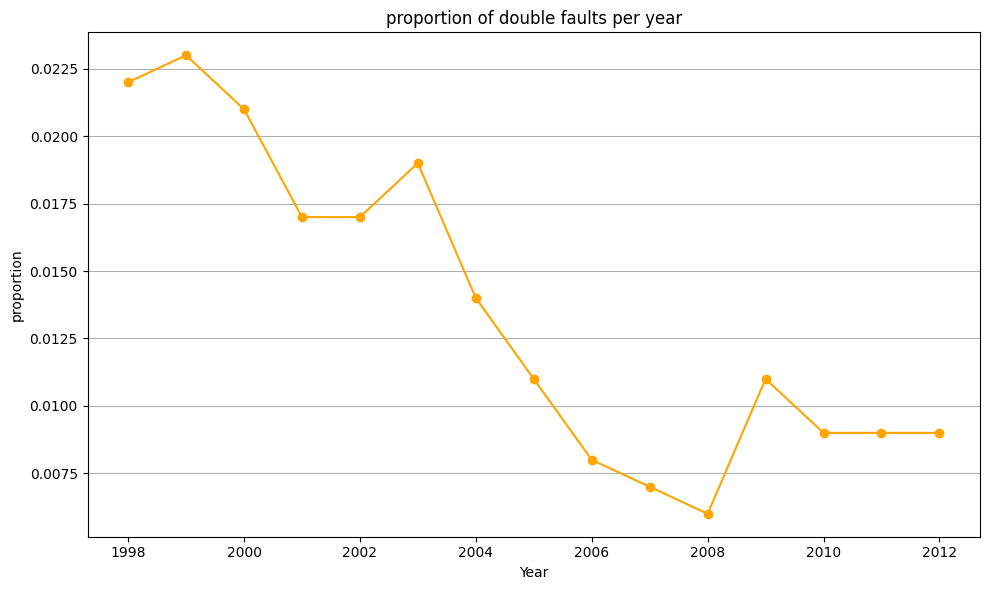

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(proportion_per_year.index, proportion_per_year['proportion of double faults'], marker='o', linestyle='-', color='orange')
plt.title("proportion of double faults per year")
plt.xlabel("Year")
plt.ylabel("proportion")
plt.grid(axis='y')
plt.tight_layout()
plt.show()